## Exploratory Analysis of NYC Property Sales Data

### Context

- Project ini menggunakan dataset NYC Property Sales yang berisi lebih dari 84.000 catatan transaksi penjualan properti di lima borough utama New York City selama satu tahun.
- Fokus utama proyek adalah pada eksplorasi data dan analisis statistik deskriptif untuk memahami distribusi harga dan pola pasar properti di wilayah tersebut.
- Melakukan pembersihan data seperti menangani nilai harga yang tidak valid, konversi tipe data, dan identifikasi outlier.
- Menerapkan metode statistik seperti confidence interval dan hypothesis testing untuk membandingkan harga antar wilayah/kategori atau kategori properti.
- Link dataset: https://www.kaggle.com/datasets/new-york-city/nyc-property-sales

### Objective

- Mengenali karakteristik umum dari data transaksi penjualan properti di New York City selama satu tahun.
- Melakukan proses data cleaning dan preprocessing agar siap dianalisis secara statistik.
- Menggambarkan pola distribusi harga properti di masing-masing borough.
- Menggunakan visualisasi statistik (histogram, boxplot, heatmap) untuk memperjelas temuan dan insight.
- Melakukan analisis statistik dasar seperti confidence interval dan uji hipotesis (hypothesis testing) untuk mendukung pengambilan kesimpulan berbasis data.

### Inspiration

- Wilayah mana yang memiliki harga jual rata-rata tertinggi?
- Apakah jenis bangunan memengaruhi harga jual secara signifikan?
- Seberapa besar variasi harga antar wilayah dan kategori properti?

### Import Libraries and Dataset

In [1]:
# Melakukan import library yang akan digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import scipy.stats as stats
from scipy.stats import lognorm, gamma, norm, expon

# import warnings
# pd.options.mode.chained_assignment = None
# warnings.filterwarnings('ignore')

In [2]:
# Melakukan import dan menampilkan dataframe
df= pd.read_csv('nyc-rolling-sales.csv', skipinitialspace=True)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,NaN,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,NaN,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,NaN,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,NaN,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,NaN,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [3]:
# Menampilkan jumlah baris dan kolom yang dimiliki dataframe
df.shape

(84548, 22)

Dataset yang digunakan, yaitu dataset NYC Property Sales terdiri dari 84548 baris dan 22 kolom.

In [4]:
# Menampilkan nama kolom pada dataframe
df.columns

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [5]:
# Menampilkan informasi berupa nama kolom dan tipe data dari setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      84548 non-null  int64  
 1   BOROUGH                         84548 non-null  int64  
 2   NEIGHBORHOOD                    84548 non-null  object 
 3   BUILDING CLASS CATEGORY         84548 non-null  object 
 4   TAX CLASS AT PRESENT            83810 non-null  object 
 5   BLOCK                           84548 non-null  int64  
 6   LOT                             84548 non-null  int64  
 7   EASE-MENT                       0 non-null      float64
 8   BUILDING CLASS AT PRESENT       83810 non-null  object 
 9   ADDRESS                         84548 non-null  object 
 10  APARTMENT NUMBER                19052 non-null  object 
 11  ZIP CODE                        84548 non-null  int64  
 12  RESIDENTIAL UNITS               

In [6]:
# Mengubah tipe data beberapa kolom menjadi numeric
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

# Mengubah tipe data kolom SALE DATE menjadi datetime
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'])

### Data Cleaning

In [7]:
df.isna().sum()

Unnamed: 0                            0
BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                738
BLOCK                                 0
LOT                                   0
EASE-MENT                         84548
BUILDING CLASS AT PRESENT           738
ADDRESS                               0
APARTMENT NUMBER                  65496
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

In [8]:
# Missing values pada data
missing_values = df.isnull().sum() / len(df) * 100

# Persen missing values dari keseluruhan data
percent_missing = missing_values[missing_values > 0].map('{:.2f}%'.format)

# create dataframe with percentage of missing values
# Membuat dataframe
df_missing = pd.DataFrame([percent_missing], index=['percent missing'])
df_missing

,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
percent missing,0.87%,100.00%,0.87%,77.47%,31.05%,32.66%,17.22%


- Dari proses di atas dapat diketahui bahwa terdaPat variabel yang memiliki nilai missing value >50% sehingga akan lebih baik untuk menghapus variabel tersebut pada dataframe.
- Sedangkan variabel lain yang memiliki missing value <50% akan diisi dengan nilai rata-rata atau nilai modus pada variabel tersebut.

In [9]:
# Menghapus kolom yang tidak relevan
df.drop(columns=['Unnamed: 0', 'EASE-MENT', 'APARTMENT NUMBER'], inplace=True)

- Kolom Unnamed: 0 dianggap kurang relevan karena hanya berisi nomor urut dan tidak memiliki informasi tambahan. 
- Kolom EASE MENT dianggap kurang relevan karena hampir semua nilai di kolom tersebut null dan tidak memengaruhi nilai jual sehingga aman untuk dihapus.
- Kolom APARTMENT NUMBER dianggap kurang relevan karena memiliki nilai missing values yg cukup besar, yaitu 77% sehingga leih baik dihapus

In [10]:
# Membuat fungsi untuk mengisi data null yang bertipe numeric menjadi mean(rata-rata)
def fill_nan(df):
    for column in df.select_dtypes('number').columns:
        df[column].fillna(df[column].mean(), inplace=True)
    return df

# Mengisi nilai null menjadi mean
df_fillna = fill_nan(df)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.276456e+06,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.276456e+06,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17


In [11]:
# Membuat fungsi untuk mengisi data null yang bertipe kategori menjadi modus
def fill_nan(df):
    for column in df.select_dtypes('object').columns:
        df[column].fillna(df[column].mode()[0], inplace=True)
    return df

# Mengisi nilai null menjadi mean
df_fillna = fill_nan(df)
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6.625000e+06,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,1.276456e+06,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,1.276456e+06,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3.936272e+06,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8.000000e+06,2016-11-17


In [12]:
df.isna().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [13]:
# Menghapus data pada kolom SALE PRICE pada dataframe
df.drop(df[df['SALE PRICE'] <= 0].index, inplace=True)
df.drop(df[df['GROSS SQUARE FEET'] <= 0].index, inplace=True)
df.drop(df[df['LAND SQUARE FEET'] <= 0].index, inplace=True)

In [14]:
df = df[(df['SALE PRICE'] > 0) & 
        (df['GROSS SQUARE FEET'] > 0) & 
        (df['LAND SQUARE FEET'] > 0)]

- Pada variabel SALE PRICE terdapat penjualan dengan harga 0, yang mana harga ini bukan transaksi pasar sesungguhnya melainkan kepemilikan antar keluarga sehingga dianggap kurang relevan karena bukan objek yang ingin dianalisis.
-  Pada variabel GROSS SQUARE FEET dan LAND SQUARE FEET tidak mungkin terdapat properti tanpa tanah atau bangunan sehingga akan dihapus. Hal ini karena nilai 0 dapat berarti data hilang atau properti belum dibangun.

In [15]:
df.duplicated().sum()

536

In [16]:
df[df.duplicated()]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011,1,0,1,1588.000000,5653.000000,1900,1,A4,1.000000e+01,2017-01-30
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011,1,0,1,1588.000000,5653.000000,1900,1,A4,1.000000e+01,2017-01-30
471,1,CHELSEA,10 COOPS - ELEVATOR APARTMENTS,2,797,76,D4,"166 WEST 22ND STREET, 4C",10011,0,0,0,3941.675775,4045.707479,1950,2,D4,8.390000e+05,2017-06-29
683,1,CHELSEA,13 CONDOS - ELEVATOR APARTMENTS,2,774,1042,R4,252 SEVENTH AVENUE,10001,1,0,1,3941.675775,4045.707479,0,2,R4,1.500000e+06,2016-10-05
1436,1,CIVIC CENTER,46 CONDO STORE BUILDINGS,4,175,1301,RK,90 FRANKLIN STREET,10013,0,0,1,3941.675775,4045.707479,0,4,RK,1.276456e+06,2017-04-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84209,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,748,18,A2,586 WOOLLEY AVENUE,10314,1,0,1,5000.000000,1080.000000,1955,1,A2,1.276456e+06,2017-02-07
84292,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,735,24,B9,492 INGRAM AVENUE,10314,2,0,2,2200.000000,1440.000000,1970,1,B9,1.276456e+06,2016-09-08
84319,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,790,80,B2,267 CRAFTON AVENUE,10314,2,0,2,4320.000000,2288.000000,1970,1,B2,1.276456e+06,2017-01-10
84346,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,1975,513,B2,180 WALCOTT AVENUE,10314,2,0,2,4100.000000,2010.000000,1975,1,B2,1.276456e+06,2017-07-03


In [17]:
# Menghapus data yang duplikat
df = df.drop_duplicates()

### Exploratory Data Analysis

### Descriptive Statistics Dataset

In [18]:
df[['SALE PRICE', 'GROSS SQUARE FEET', 'LAND SQUARE FEET']].describe()

,SALE PRICE,GROSS SQUARE FEET,LAND SQUARE FEET
count,6.509700e+04,6.509700e+04,6.509700e+04
mean,1.531285e+06,4.473643e+03,4.480345e+03
std,1.169312e+07,3.060691e+04,3.882255e+04
min,1.000000e+00,1.200000e+02,7.000000e+00
25%,4.550000e+05,1.728000e+03,2.473000e+03
50%,8.334170e+05,3.500000e+03,3.941676e+03
75%,1.276456e+06,4.045707e+03,3.941676e+03
max,2.210000e+09,3.750565e+06,4.252327e+06


Pada bagian ini menampilkan statistik deskriptif untuk memberikan gambaran umum terhadap distribusi dan karakteristik numerik dataset, khususnya pada variabel SALE PRICE, GROSS SQUARE FEET, dan LAND SQUARE FEET. Langkah ini bertujuan untuk mengidentifikasi pola dan mendeteksi anomali agar analisis yang dilakukan dapat fokus pada transaksi yang merepresentasikan aktivitas pasar yang valid.

### Measure of Central Tendency

#### Sale Price

In [19]:
# Mean
mean_price = statistics.mean(df['SALE PRICE'])
print(f'Mean dari variabel SALE PRICE   : {mean_price}')

# Median
median_price = statistics.median(df['SALE PRICE'])
print(f'Median dari variabel SALE PRICE : {median_price}')

# Modus
mode_price = statistics.mode(df['SALE PRICE'])
print(f'Modus dari variabel SALE PRICE  : {mode_price}')

Mean dari variabel SALE PRICE   : 1531284.5387237603
Median dari variabel SALE PRICE : 833417.0
Modus dari variabel SALE PRICE  : 1276456.4977638705


Hasil measure of central tendency dari variabel SALE PRICE menunjukkan bahwa nilai mean jauh lebih tinggi dibandingkan nilai median. Hal ini mengindikasi bahwa distribusi variabel SALE PRICE bersifat right-skewed, yaitu terdapat nilai ekstrim yang menarik rata-rata ke kanan.

#### Gross Square Feet

In [20]:
# Mean
mean_gross_square = statistics.mean(df['GROSS SQUARE FEET'])
print(f'Mean dari variabel GROSS SQUARE FEET   : {mean_gross_square}')

# Median
median_gross_square = statistics.median(df['GROSS SQUARE FEET'])
print(f'Median dari variabel GROSS SQUARE FEET : {median_gross_square}')

# Modus
mode_gross_square = statistics.mode(df['GROSS SQUARE FEET'])
print(f'Modus dari variabel GROSS SQUARE FEET  : {mode_gross_square}')

Mean dari variabel GROSS SQUARE FEET   : 4473.643075728622
Median dari variabel GROSS SQUARE FEET : 3500.0
Modus dari variabel GROSS SQUARE FEET  : 4045.707478572432


Hasil measure of central tendency dari variabel GROSS SQUARE FEET menunjukkan bahwa terdapat selisih antara nilai mean dan median. Hal ini mengindikasi adanya outlier yang mempengaruhi rata-rata.

#### Land Square Feet

In [21]:
# Mean
mean_land_square = statistics.mean(df['LAND SQUARE FEET'])
print(f'Mean dari variabel LAND SQUARE FEET   : {mean_land_square}')

# Median
median_land_square = statistics.median(df['LAND SQUARE FEET'])
print(f'Median dari variabel LAND SQUARE FEET : {median_land_square}')

# Modus
mode_land_square = statistics.mode(df['LAND SQUARE FEET'])
print(f'Modus dari variabel LAND SQUARE FEET  : {mode_land_square}')

Mean dari variabel LAND SQUARE FEET   : 4480.344634177561
Median dari variabel LAND SQUARE FEET : 3941.675775353369
Modus dari variabel LAND SQUARE FEET  : 3941.675775353369


Hasil measure of central tendency dari variabel LAND SQUARE FEET menunjukkan bahwa selisih antara nilai mean dan median relatif dekat yang mengindikasi bahwa distribusi LAND SQUARE FEET cenderung lebih simetris dibandingkan dua variabel sebelumnya.

### Measure of Spread

#### Sale Price

In [22]:
# Range
range_price =  df['SALE PRICE'].max() - df['SALE PRICE'].min()
print(f'Range dari variabel SALE PRICE                      : {range_price}')

# Standard Deviation
std_price = statistics.stdev(df['SALE PRICE'])
print(f'Standard Deviation dari variabel SALE PRICE         : {std_price}')

# Interquartile
iqr_price = df['SALE PRICE'].quantile(0.75) - df['SALE PRICE'].quantile(0.25)
print(f'Interquartile dari variabel SALE PRICE              : {iqr_price}')

# Variance
var_price = statistics.variance(df['SALE PRICE'])
print(f'Variance dari variabel SALE PRICE                   : {var_price}')

# Coefficient of Variation
cv_price = std_price/mean_price
print(f'Coefficient of Variation dari variabel SALE PRICE   : {cv_price}')

Range dari variabel SALE PRICE                      : 2209999999.0
Standard Deviation dari variabel SALE PRICE         : 11693116.175835367
Interquartile dari variabel SALE PRICE              : 821456.4977638705
Variance dari variabel SALE PRICE                   : 136728965901582.72
Coefficient of Variation dari variabel SALE PRICE   : 7.636148527680508


Hasil measure of spread dari variabel SALE PRICE menunjukkan bahwa persebaran sangat besar dengan range dan variance yang tinggi, serta nilai coefficient of variation > 1 menandakan variasi relatif yang ekstrem. Hal ini mengindikasi kemungkinan adanya outlier.

#### Gross Square Feet

In [23]:
# Range
range_gross_square =  df['GROSS SQUARE FEET'].max() - df['GROSS SQUARE FEET'].min()
print(f'Range dari variabel GROSS SQUARE FEET                      : {range_gross_square}')

# Standard Deviation
std_gross_square = statistics.stdev(df['GROSS SQUARE FEET'])
print(f'Standard Deviation dari variabel GROSS SQUARE FEET         : {std_gross_square}')

# Interquartile
iqr_gross_square = df['GROSS SQUARE FEET'].quantile(0.75) - df['GROSS SQUARE FEET'].quantile(0.25)
print(f'Interquartile dari variabel GROSS SQUARE FEET              : {iqr_gross_square}')

# Variance
var_gross_square = statistics.variance(df['GROSS SQUARE FEET'])
print(f'Variance dari variabel GROSS SQUARE FEET                   : {var_gross_square}')

# Coefficient of Variation
cv_gross_square = std_gross_square/mean_gross_square
print(f'Coefficient of Variation dari variabel GROSS SQUARE FEET   : {cv_gross_square}')

Range dari variabel GROSS SQUARE FEET                      : 3750445.0
Standard Deviation dari variabel GROSS SQUARE FEET         : 30606.912378471203
Interquartile dari variabel GROSS SQUARE FEET              : 2317.707478572432
Variance dari variabel GROSS SQUARE FEET                   : 936783085.3434138
Coefficient of Variation dari variabel GROSS SQUARE FEET   : 6.841608027365093


Hasil measure of spread dari variabel GROSS SQUARE FEET menunjukkan bahwa persebaran sangat besar dengan range dan variance yang tinggi, serta nilai coefficient of variation > 1 menandakan variasi relatif yang ekstrem. Hal ini mengindikasi kemungkinan adanya outlier.

#### Land Square Feet

In [24]:
# Range
range_land_square =  df['LAND SQUARE FEET'].max() - df['LAND SQUARE FEET'].min()
print(f'Range dari variabel LAND SQUARE FEET                      : {range_land_square}')

# Standard Deviation
std_land_square = statistics.stdev(df['LAND SQUARE FEET'])
print(f'Standard Deviation dari variabel LAND SQUARE FEET         : {std_land_square}')

# Interquartile 
iqr_land_square = df['LAND SQUARE FEET'].quantile(0.75) - df['LAND SQUARE FEET'].quantile(0.25)
print(f'Interquartile dari variabel LAND SQUARE FEET              : {iqr_land_square}')

# Variance
var_land_square = statistics.variance(df['LAND SQUARE FEET'])
print(f'Variance dari variabel LAND SQUARE FEET                   : {var_land_square}')

# Coefficient of Variation
cv_land_square = std_land_square/mean_land_square
print(f'Coefficient of Variation dari variabel LAND SQUARE FEET   : {cv_land_square}')

Range dari variabel LAND SQUARE FEET                      : 4252320.0
Standard Deviation dari variabel LAND SQUARE FEET         : 38822.55264239353
Interquartile dari variabel LAND SQUARE FEET              : 1468.6757753533689
Variance dari variabel LAND SQUARE FEET                   : 1507190593.671417
Coefficient of Variation dari variabel LAND SQUARE FEET   : 8.665081776576331


Hasil measure of spread dari variabel GROSS SQUARE FEET menunjukkan variasi relatif tertinggi dibandingkan variabel sebelumnya, serta memiliki coefficient of variation yang sangat besar.

### Handling Outliers

#### Sale Price

Text(0.5, 1.0, 'Boxplot of Sale Price')

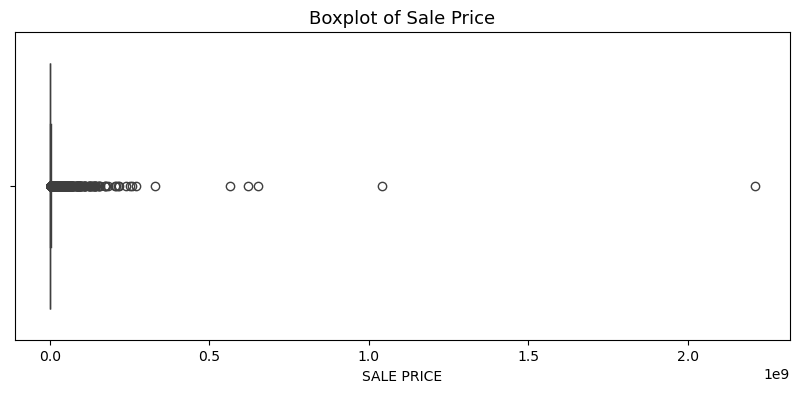

In [25]:
# Menampilkan boxplot variabel SALE PRICE
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['SALE PRICE'])
plt.title("Boxplot of Sale Price", size=13)

In [26]:
# Menggunakan log transform untuk menghapus outliers
df['LOG_SALE_PRICE'] = np.log1p(df['SALE PRICE'])  # safer than log() for zero values

Text(0.5, 1.0, 'Boxplot of Sale Price')

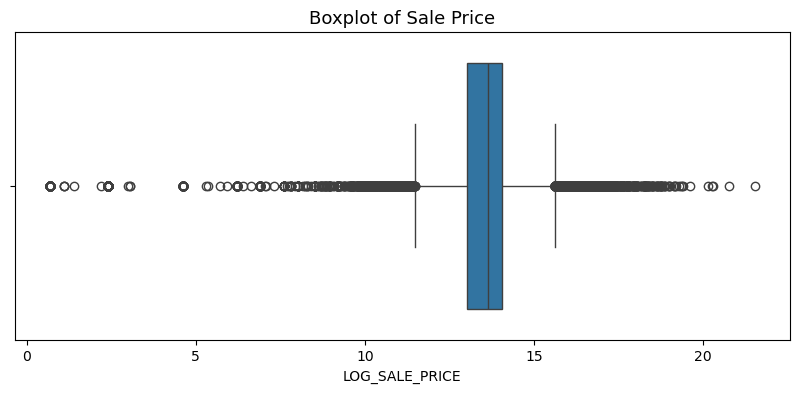

In [27]:
# Menampilkan boxplot variabel SALE PRICE
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['LOG_SALE_PRICE'])
plt.title("Boxplot of Sale Price", size=13)

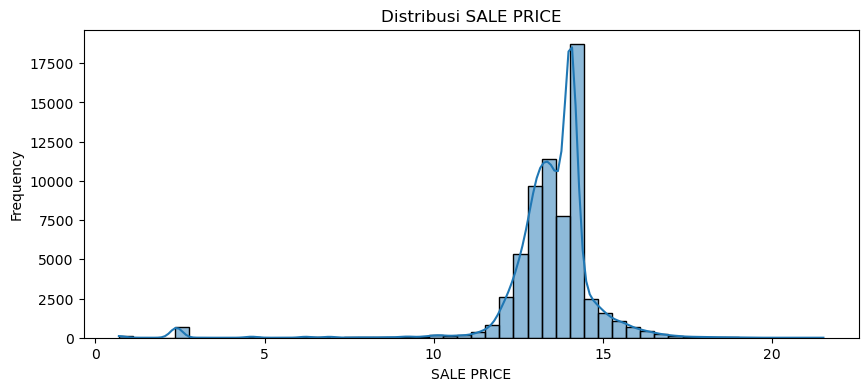

In [28]:
# Menampilkan histogram dari variabel SALE PRICE setelah log transform
plt.figure(figsize=(10,4))
sns.histplot(df['LOG_SALE_PRICE'], bins=50, kde=True)
plt.title('Distribusi SALE PRICE')
plt.xlabel('SALE PRICE')
plt.ylabel('Frequency')
plt.show()


((array([-4.25085383, -4.04784299, -3.93726665, ...,  3.93726665,
          4.04784299,  4.25085383]),
  array([ 0.69314718,  0.69314718,  0.69314718, ..., 20.29555512,
         20.76248655, 21.51625835])),
 (1.2687305816125547, 13.438858348879453, 0.7802611587891168))

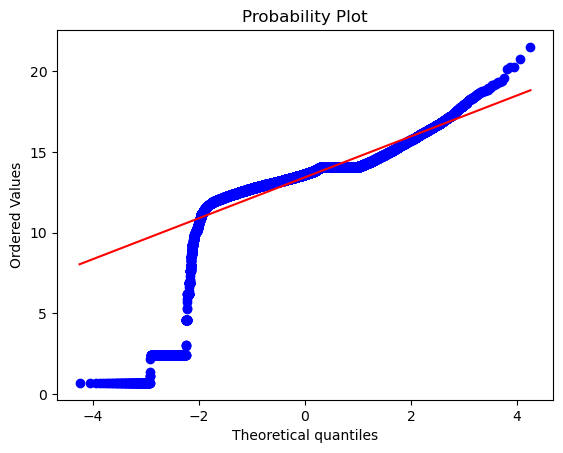

In [29]:
# Menampilkan probality plot dari variabel SALE PRICE setelah log transform
stats.probplot(df['LOG_SALE_PRICE'], dist="norm", plot=plt) 

In [30]:
df.drop(columns='LOG_SALE_PRICE', inplace=True)

In [31]:
# Melakukan trimming quantile dengan menghapus 1% data terbawah dan 5% data teratas yang terlalu ekstrem (outliers)
lower_limit = df['SALE PRICE'].quantile(0.01)
upper_limit = df['SALE PRICE'].quantile(0.99)
df = df[(df['SALE PRICE'] <= upper_limit) & (df['SALE PRICE'] >= lower_limit)]

Text(0.5, 1.0, 'Boxplot of Sale Price')

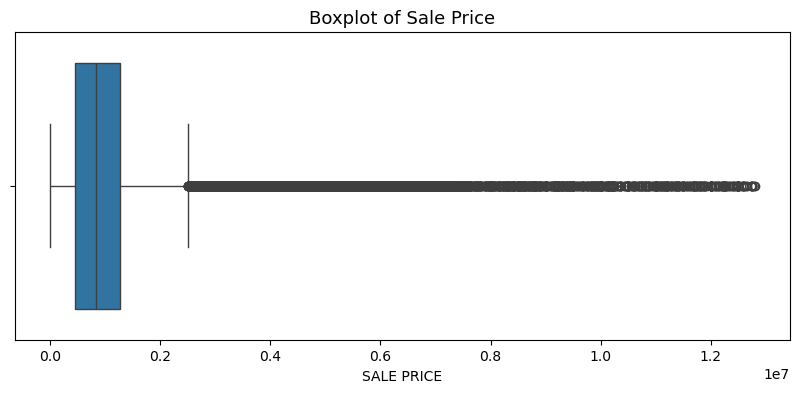

In [32]:
# Menampilkan boxplot variabel SALE PRICE
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['SALE PRICE'])
plt.title("Boxplot of Sale Price", size=13)

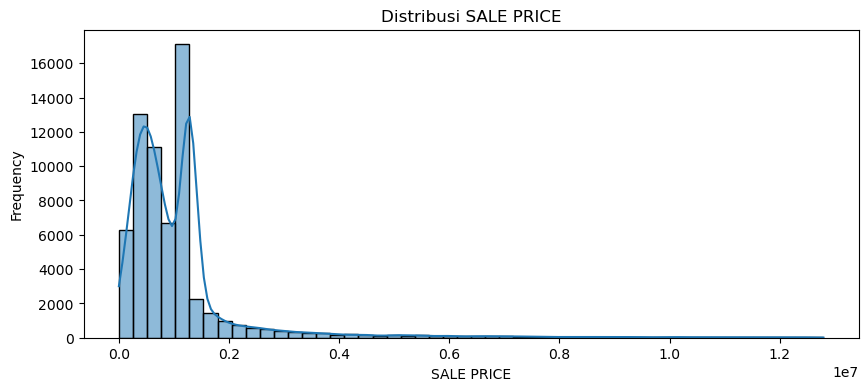

In [33]:
# Menampilkan histogram dari variabel SALE PRICE setelah trimming quantile
plt.figure(figsize=(10,4))
sns.histplot(df['SALE PRICE'], bins=50, kde=True)
plt.title('Distribusi SALE PRICE')
plt.xlabel('SALE PRICE')
plt.ylabel('Frequency')
plt.show()


<b>Kesimpulan SALE PRICE<b>

- Visualisasi distribusi awal untuk variabel SALE PRICE menunjukkan bahwa data memiliki skewness kanan (right skewed) yang ekstrem.
- Metode log transformation digunakan mengurangi skewness dan mengkompres rentang nilai yg terlalu lebar. Namun hasilnya menunjukkan bahwa tranformasi inni belum efektif untuk menormalkan distribusi.
- Metode quantile trimming dierapkan dengan menghapus 1% data terbawah yg kemungkinan berisi anomali seperti SALE PRICE = 0 dan 1% data teratas yang kemungkinan adalah properti yg sangat mahal (outliers heavy right-tail)
- Setelah melakukan handling outliers dengan log transformation dan trimming quantile, dapat dilihat bahwa distribusi variabel SALE PRICE setelah trimming quantile lebih simetris. Kemudian probabality plot setelah dilakukan trimming quantile hasilnya penyebaran titik lebih dekat dengan garis diagonal dibandingkan dengan menggunakan log transformation. Oleh karena itu, metode handling outliers yang digunakan dalam proyek ini adalah quantile trimming.

#### Gross Square Feet

Text(0.5, 1.0, 'Boxplot of GROSS SQUARE FEET')

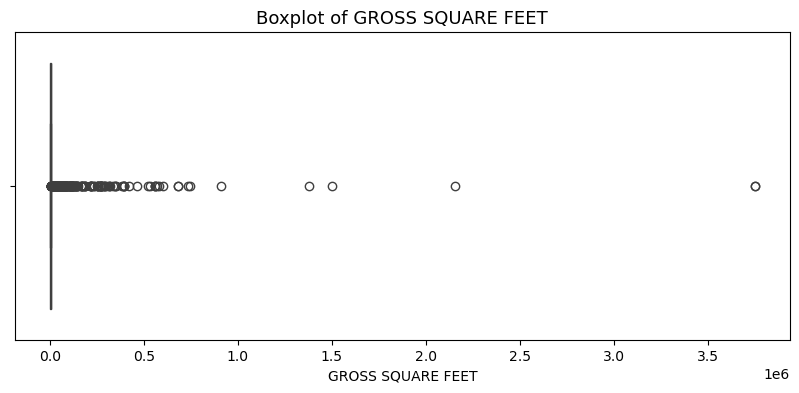

In [34]:
# Menampilkan boxplot variabel SALE PRICE
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['GROSS SQUARE FEET'])
plt.title("Boxplot of GROSS SQUARE FEET", size=13)

In [35]:
# Menggunakan log transform untuk menghapus outliers
df['LOG_GROSS_SQUARE_FEET'] = np.log1p(df['GROSS SQUARE FEET'])

Text(0.5, 1.0, 'Boxplot of LOG_GROSS_SQUARE_FEET')

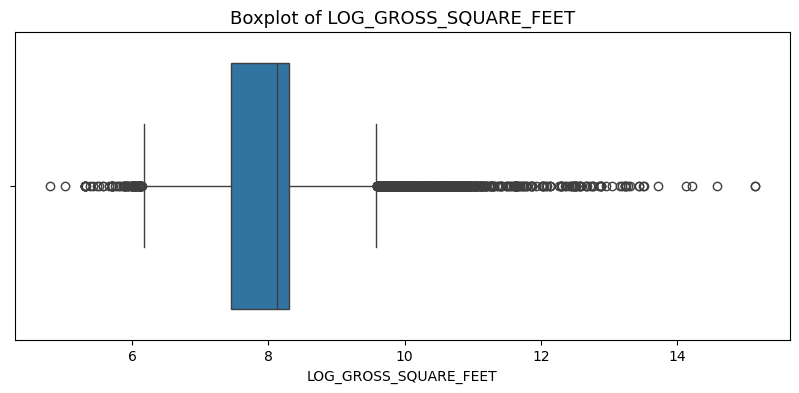

In [36]:
# Menampilkan boxplot variabel LOG_GROSS_SQUARE_FEET
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['LOG_GROSS_SQUARE_FEET'])
plt.title("Boxplot of LOG_GROSS_SQUARE_FEET", size=13)

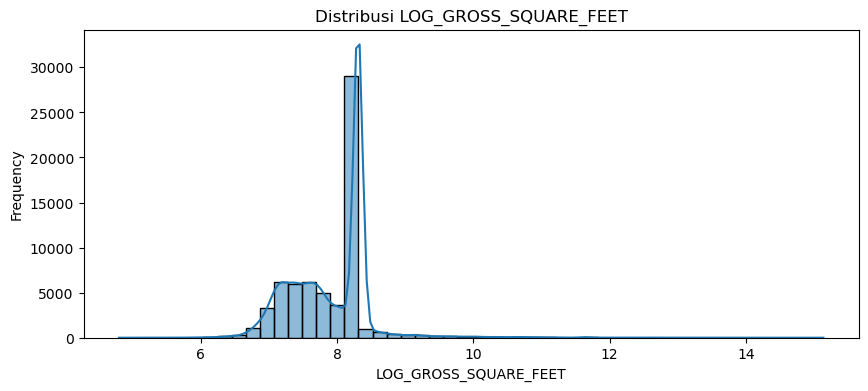

In [37]:
# Menampilkan histogram dari variabel LOG_GROSS_SQUARE_FEET setelah log transform
plt.figure(figsize=(10,4))
sns.histplot(df['LOG_GROSS_SQUARE_FEET'], bins=50, kde=True)
plt.title('Distribusi LOG_GROSS_SQUARE_FEET')
plt.xlabel('LOG_GROSS_SQUARE_FEET')
plt.ylabel('Frequency')
plt.show()

((array([-4.24819875, -4.04506722, -3.9344206 , ...,  3.9344206 ,
          4.04506722,  4.24819875]),
  array([ 4.79579055,  5.01727984,  5.30330491, ..., 14.58353003,
         15.13741732, 15.13741732])),
 (0.5644552933772319, 7.919493228616703, 0.9199288479215021))

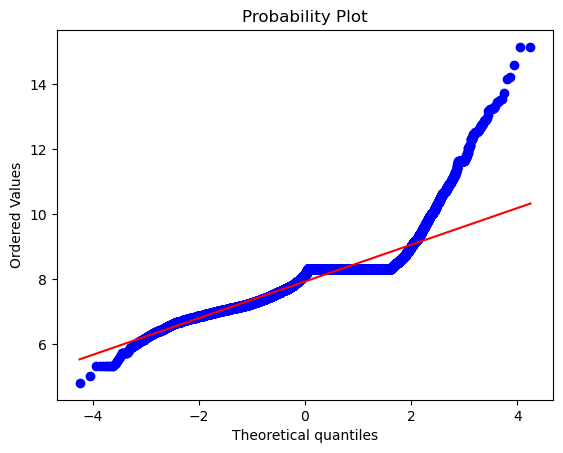

In [38]:
# Menampilkan probability plot variabel LOG_GROSS_SQUARE_FEET setelah log transform
stats.probplot(df['LOG_GROSS_SQUARE_FEET'], dist="norm", plot=plt) 

In [39]:
# Melakukan trimming quantile dengan menghapus 1% data terbawah dan 5% data teratas yang terlalu ekstrem (outliers)
lower_limit = df['GROSS SQUARE FEET'].quantile(0.01)
upper_limit = df['GROSS SQUARE FEET'].quantile(0.99)
df = df[(df['GROSS SQUARE FEET'] <= upper_limit) & (df['GROSS SQUARE FEET'] >= lower_limit)]

((array([-4.24368597, -4.04034898, -3.92958271, ...,  3.92958271,
          4.04034898,  4.24368597]),
  array([  810.,   810.,   810., ..., 18564., 18590., 18640.])),
 (1397.8522635424843, 3079.3626522526833, 0.8620281616551021))

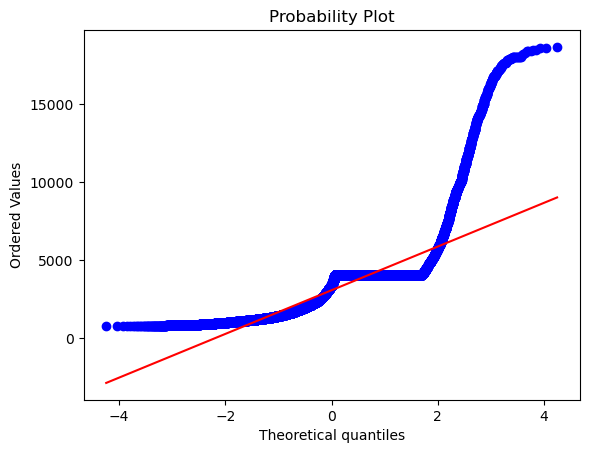

In [40]:
# Menampilkan probability plot variabel LOG_GROSS_SQUARE_FEET setelah log transform
stats.probplot(df['GROSS SQUARE FEET'], dist="norm", plot=plt) 

<b> Kesimpulan GROSS SQUARE FEET<b>

- Visualisasi distribusi awal untuk variabel GROSS SQUARE FEET menunjukkan bahwa data memiliki skewness kanan (right skewed) yang ekstrem.
Metode log transformation digunakan mengurangi skewness dan mengkompres rentang nilai yg terlalu lebar. Namun hasilnya menunjukkan bahwa tranformasi inni belum efektif untuk menormalkan distribusi.
- Metode quantile trimming dierapkan dengan menghapus 1% data terbawah yg kemungkinan berisi anomali seperti SALE PRICE = 0 dan 1% data teratas yang kemungkinan adalah properti yg sangat mahal (outliers heavy right-tail)
- Setelah melakukan handling outliers dengan log transformation dan trimming quantile, dapat dilihat bahwa distribusi variabel GROSS SQUARE FEET setelah log transform lebih simetris. Kemudian probabality plot setelah dilakukan log transform hasilnya penyebaran titik lebih dekat dengan garis diagonal dibandingkan dengan menggunakan quantile trimming. Oleh karena itu, metode handling outliers yang digunakan dalam proyek ini adalah log tranformation.


#### LAND SQUARE FEET

Text(0.5, 1.0, 'Boxplot of LAND SQUARE FEET')

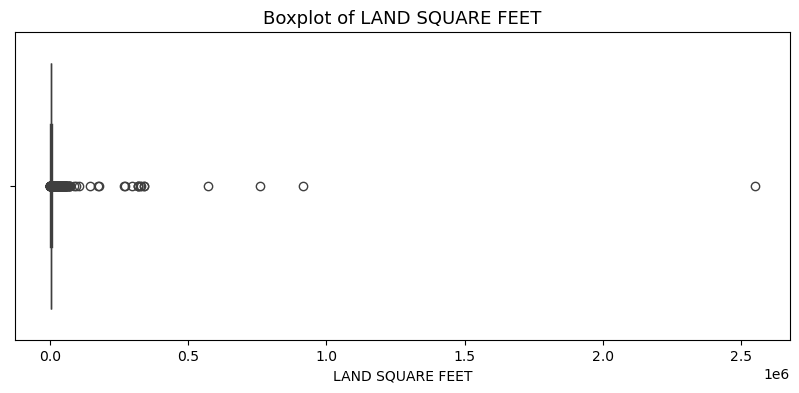

In [41]:
# Menampilkan boxplot variabel SALE PRICE
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['LAND SQUARE FEET'])
plt.title("Boxplot of LAND SQUARE FEET", size=13)

In [42]:
# Menggunakan log transform untuk menghapus outliers
df['LOG_LAND_SQUARE_FEET'] = np.log1p(df['LAND SQUARE FEET'])

Text(0.5, 1.0, "Boxplot of LOG_LAND_SQUARE_FEET'")

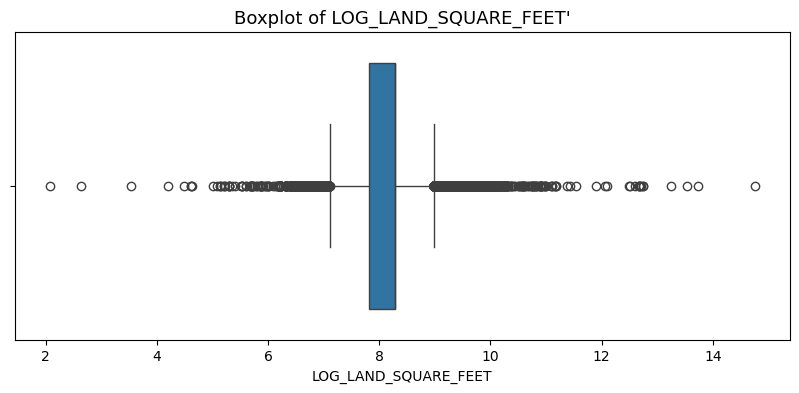

In [43]:
# Menampilkan boxplot variabel LOG_LAND_SQUARE_FEET'
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['LOG_LAND_SQUARE_FEET'])
plt.title("Boxplot of LOG_LAND_SQUARE_FEET'", size=13)

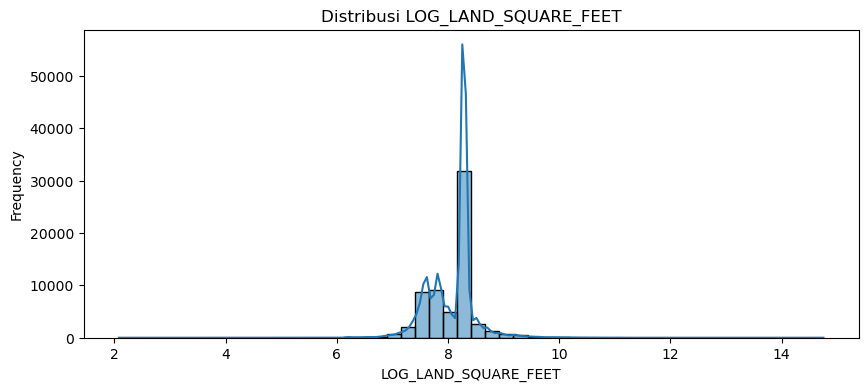

In [44]:
# Menampilkan histogram dari variabel LOG_LAND_SQUARE_FEET setelah log transform
plt.figure(figsize=(10,4))
sns.histplot(df['LOG_LAND_SQUARE_FEET'], bins=50, kde=True)
plt.title('Distribusi LOG_LAND_SQUARE_FEET')
plt.xlabel('LOG_LAND_SQUARE_FEET')
plt.ylabel('Frequency')
plt.show()

((array([-4.24368597, -4.04034898, -3.92958271, ...,  3.92958271,
          4.04034898,  4.24368597]),
  array([ 2.07944154,  2.63905733,  3.52636052, ..., 13.53843998,
         13.72610978, 14.75127994])),
 (0.40384015615556457, 8.081983700560004, 0.9270374136253231))

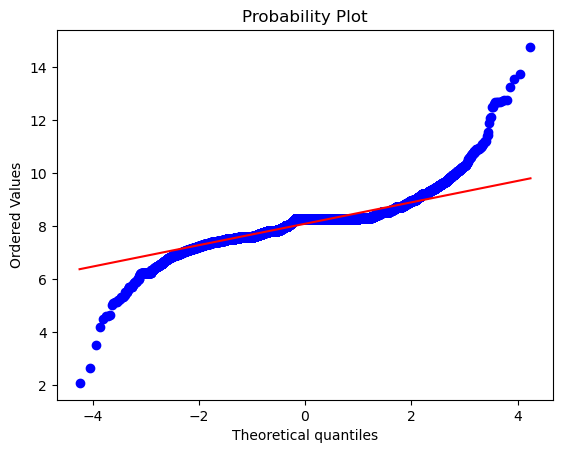

In [45]:
# Menampilkan probability plot variabel LOG_LAND_SQUARE_FEET setelah log transform
stats.probplot(df['LOG_LAND_SQUARE_FEET'], dist="norm", plot=plt) 

In [46]:
# Melakukan trimming quantile dengan menghapus 1% data terbawah dan 5% data teratas yang terlalu ekstrem (outliers)
lower_limit = df['LAND SQUARE FEET'].quantile(0.01)
upper_limit = df['LAND SQUARE FEET'].quantile(0.99)
df = df[(df['LAND SQUARE FEET'] <= upper_limit) & (df['LAND SQUARE FEET'] >= lower_limit)]

((array([-4.23918863, -4.03564646, -3.92476069, ...,  3.92476069,
          4.03564646,  4.23918863]),
  array([ 1080.,  1080.,  1080., ..., 10725., 10735., 10740.])),
 (1131.682912953117, 3439.721857456512, 0.9167530022621209))

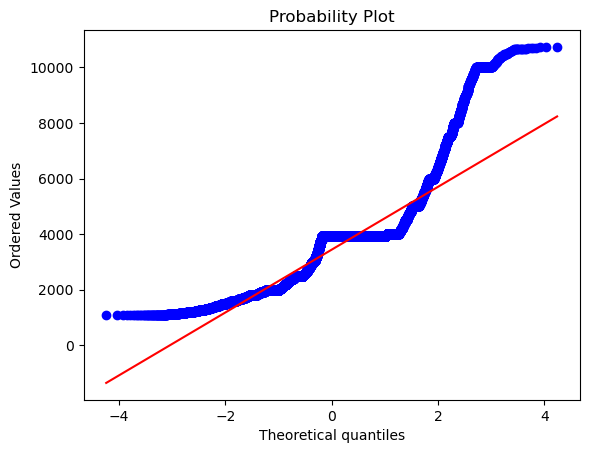

In [47]:
# Menampilkan probability plot variabel LOG_GROSS_SQUARE_FEET setelah log transform
stats.probplot(df['LAND SQUARE FEET'], dist="norm", plot=plt) 

<b> Kesimpulan LAND SQUARE FEET <b>

- Visualisasi distribusi awal untuk variabel LAND SQUARE FEET menunjukkan bahwa data memiliki skewness kanan (right skewed) yang ekstrem.
Metode log transformation digunakan mengurangi skewness dan mengkompres rentang nilai yg terlalu lebar. Namun hasilnya menunjukkan bahwa tranformasi inni belum efektif untuk menormalkan distribusi.
- Metode quantile trimming dierapkan dengan menghapus 1% data terbawah yg kemungkinan berisi anomali seperti SALE PRICE = 0 dan 1% data teratas yang kemungkinan adalah properti yg sangat mahal (outliers heavy right-tail)
- Setelah melakukan handling outliers dengan log transformation dan trimming quantile, dapat dilihat bahwa distribusi variabel LAND SQUARE FEET setelah log transform lebih simetris. Kemudian probabality plot setelah dilakukan log transform hasilnya penyebaran titik lebih dekat dengan garis diagonal dibandingkan dengan menggunakan quantile trimming. Oleh karena itu, metode handling outliers yang digunakan dalam proyek ini adalah log tranformation.


### Fitting Statistical Distributions

#### Sale Price

<b> Histogram Perbandingan SALE PRICE <b>

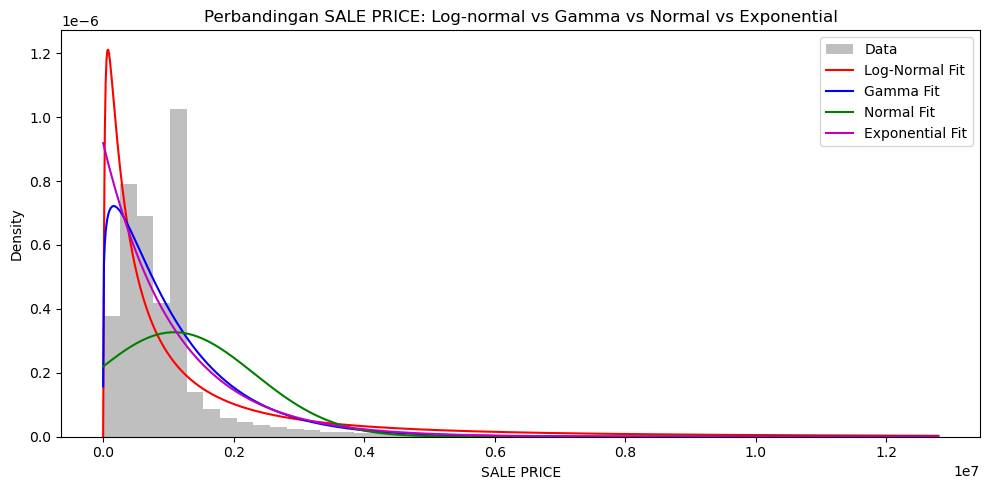

In [48]:
# Mengambil variabel data
data = df['SALE PRICE']

# Membuat grid untuk plot
x = np.linspace(min(data), max(data), 1000)

# Fitting log-Normal
shape_ln, loc_ln, scale_ln = lognorm.fit(data, floc=0)
pdf_ln = lognorm.pdf(x, shape_ln, loc=loc_ln, scale=scale_ln)

# Fitting Gamma
shape_g, loc_g, scale_g = gamma.fit(data, floc=0)
pdf_g = gamma.pdf(x, shape_g, loc=loc_g, scale=scale_g)

# Fitting Normal
mu_n, std_n = norm.fit(data)
pdf_n = norm.pdf(x, mu_n, std_n)

# Fitting Exponential
loc_e, scale_e = expon.fit(data, floc=0)
pdf_e = expon.pdf(x, loc=loc_e, scale=scale_e)

# Plot Perbandingan
plt.figure(figsize=(10,5))
plt.hist(data, bins=50, density=True, alpha=0.5, color='gray', label='Data')
plt.plot(x, pdf_ln, 'r-', label='Log-Normal Fit')
plt.plot(x, pdf_g, 'b-', label='Gamma Fit')
plt.plot(x, pdf_n, 'g-', label='Normal Fit')
plt.plot(x, pdf_e, 'm-', label='Exponential Fit')
plt.xlabel('SALE PRICE')
plt.ylabel('Density')
plt.legend()
plt.title('Perbandingan SALE PRICE: Log-normal vs Gamma vs Normal vs Exponential')
plt.tight_layout()
plt.show()

<b> Fitting Parameters SALE PRICE<b>

In [49]:
print(f"--- Fitting Parameters ---\n")

# Normal Distribution
# Menghitung mean(mu) dan standard deviation(std) dari data
mu_n, std_n = stats.norm.fit(df['SALE PRICE'])
print(f"Normal Distribution Parameters     : mu={mu_n}, std={std_n:.2f}")


# Log-Norm Distribution
# Menggunakan variabel LOG_SALE_PRICE
df['LOG_SALE_PRICE'] = np.log(df['SALE PRICE'])
# Menghitung parameter dari data yg sudah di log
mu_ln, std_ln = stats.norm.fit(df['SALE PRICE'])
print(f"Log-Normal Distribution Parameters : mu={mu_ln}, std={std_ln}")

# Gamma Distribution
# Fit parameter distribusi gamma ke data
# floc=0 digunakan karena variabel SALE PRICE tidak mungkin bernilai negatif
params_g = stats.gamma.fit(df['SALE PRICE'], floc=0)
print(f"Gamma Distribution Parameters      : shape={params_g[0]:.2f}, loc={params_g[1]:.2f}, scale={params_g[2]:.2f}")

# Exponential Distribution
# Fit parameter distribusi eksponensial ke data asli
loc_e, scale_e = stats.expon.fit(df['SALE PRICE'])
print(f"Exponential Distribution Parameters: loc={loc_e:.2f}, scale={scale_e:.2f}")

--- Fitting Parameters ---

Normal Distribution Parameters     : mu=1088746.9305237853, std=1220435.21
Log-Normal Distribution Parameters : mu=1088746.9305237853, std=1220435.2078322466
Gamma Distribution Parameters      : shape=1.18, loc=0.00, scale=926396.08
Exponential Distribution Parameters: loc=10.00, scale=1088736.93


<b> Uji Kolmogrov-Smirnov (kstest) SALE PRICE <b>

In [50]:
# Melakukan Uji Kolmogrov-Smirnov Test (kstest)
print(f"--- Hasil Kolmogrof-Smirnov Test (kstest) ---\n")

# Normal Distribution
kst_n = stats.kstest(df['SALE PRICE'], 'norm', args=(mu_n, std_n))
print(f"Normal Distribuiton       : {kst_n}")

# Log-Norm Distribbution
kst_ln = stats.kstest(df['LOG_SALE_PRICE'], 'norm', args=(mu_ln, std_ln))
print(f"Log-Normal Distribution   : {kst_ln}")

# Gamma Distribution
kst_g = stats.kstest(df['SALE PRICE'], 'gamma', args=params_g)
print(f"Gamma Distribution        : {kst_g}")

# Eksponential Distribution
kst_e = stats.kstest(df['SALE PRICE'], 'expon', args=(loc_e, scale_e))
print(f"Exponential Distribution  : {kst_e}")

--- Hasil Kolmogrof-Smirnov Test (kstest) ---

Normal Distribuiton       : KstestResult(statistic=0.28445660233042647, pvalue=0.0)
Log-Normal Distribution   : KstestResult(statistic=0.8138260106581634, pvalue=0.0)
Gamma Distribution        : KstestResult(statistic=0.15957320367718053, pvalue=0.0)
Exponential Distribution  : KstestResult(statistic=0.15524883899343844, pvalue=0.0)


<b> Kesimpulan SALE PRICE<b>

Kolmogrof-Smirnov Test (kstest) digunakan untuk menguji apakah distribusi data yang dimiliki sesuai dengan distribusi teoretis tertentu. Nilai yg dihasilkan terdiri dari:
- Statistic: semakin kecil nilai statistic, maka semakin baik kesesuaian antara data dan distribusi yang diuji
- p-value: jika p-value < 0.05 maka artinya terdapat bukti yg signifikan bahwa data tidak mengikuti distribusi tersebut.


Pada hasil Kolmogrof-Smirnov Test (kstest) variabel SALE PRICE dapat disimpulkan:
- Semua distribusi memiliki p-value = 0.0, yang artinya tidak ada distribusi yang cocok secara statistik.
- Jika membandingkan dari nilai statistic, maka berikut ini adalah urutan fit yang terbaik 
Exponential (0.1552) → Gamma (0.1600) → Normal (0.2845) → Log-Normal (0.8140).
- Exponential distribution adalah jenis distribusi yang terbaik dari empat distribusi yang duji, meskipun secara statistik tetap tidak signifikan.


#### Gross Square Feet

<b> Histogram Perbandingan GROSS SQUARE FEET<b>

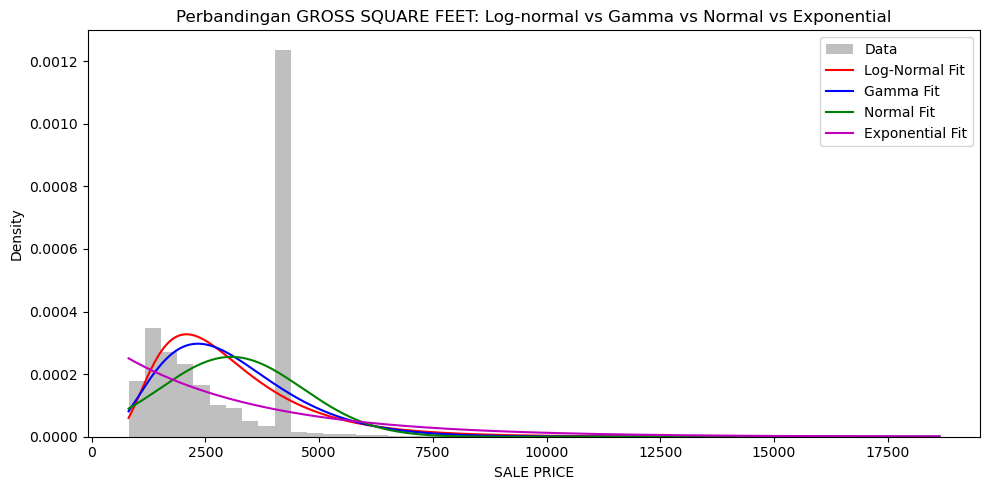

In [51]:
# Mengambil variabel data
data = df['GROSS SQUARE FEET']

# Membuat grid untuk plot
x = np.linspace(min(data), max(data), 1000)

# Fitting log-Normal
shape_ln, loc_ln, scale_ln = lognorm.fit(data, floc=0)
pdf_ln = lognorm.pdf(x, shape_ln, loc=loc_ln, scale=scale_ln)

# Fitting Gamma
shape_g, loc_g, scale_g = gamma.fit(data, floc=0)
pdf_g = gamma.pdf(x, shape_g, loc=loc_g, scale=scale_g)

# Fitting Normal
mu_n, std_n = norm.fit(data)
pdf_n = norm.pdf(x, mu_n, std_n)

# Fitting Exponential
loc_e, scale_e = expon.fit(data, floc=0)
pdf_e = expon.pdf(x, loc=loc_e, scale=scale_e)

# Plot Perbandingan
plt.figure(figsize=(10,5))
plt.hist(data, bins=50, density=True, alpha=0.5, color='gray', label='Data')
plt.plot(x, pdf_ln, 'r-', label='Log-Normal Fit')
plt.plot(x, pdf_g, 'b-', label='Gamma Fit')
plt.plot(x, pdf_n, 'g-', label='Normal Fit')
plt.plot(x, pdf_e, 'm-', label='Exponential Fit')
plt.xlabel('SALE PRICE')
plt.ylabel('Density')
plt.legend()
plt.title('Perbandingan GROSS SQUARE FEET: Log-normal vs Gamma vs Normal vs Exponential')
plt.tight_layout()
plt.show()

<b> Fitting Parameters GROSS SQUARE FEET<b>

In [52]:
print(f"--- Fitting Parameters ---\n")

# Normal Distribution
# Menghitung mean(mu) dan standard deviation(std) dari data
mu_n, std_n = stats.norm.fit(df['GROSS SQUARE FEET'])
print(f"Normal Distribution Parameters     : mu={mu_n}, std={std_n:.2f}")


# Log-Norm Distribution
# Menggunakan variabel LOG_SALE_PRICE
df['LOG_GROSS_SQUARE_FEET'] = np.log(df['GROSS SQUARE FEET'])
# Menghitung parameter dari data yg sudah di log
mu_ln, std_ln = stats.norm.fit(df['GROSS SQUARE FEET'])
print(f"Log-Normal Distribution Parameters : mu={mu_ln}, std={std_ln}")

# Gamma Distribution
# Fit parameter distribusi gamma ke data
# floc=0 digunakan karena variabel SALE PRICE tidak mungkin bernilai negatif
params_g = stats.gamma.fit(df['GROSS SQUARE FEET'], floc=0)
print(f"Gamma Distribution Parameters      : shape={params_g[0]:.2f}, loc={params_g[1]:.2f}, scale={params_g[2]:.2f}")

# Exponential Distribution
# Fit parameter distribusi eksponensial ke data asli
loc_e, scale_e = stats.expon.fit(df['GROSS SQUARE FEET'])
print(f"Exponential Distribution Parameters: loc={loc_e:.2f}, scale={scale_e:.2f}")

--- Fitting Parameters ---

Normal Distribution Parameters     : mu=3067.692266564579, std=1564.01
Log-Normal Distribution Parameters : mu=3067.692266564579, std=1564.0110779645463
Gamma Distribution Parameters      : shape=4.19, loc=0.00, scale=732.42
Exponential Distribution Parameters: loc=810.00, scale=2257.69


<b> Uji Kolmogrov-Smirnov (kstest) GROSS SQUARE FEET<b>

In [53]:
# Melakukan Uji Kolmogrov-Smirnov Test (kstest)
print(f"--- Hasil Kolmogrof-Smirnov Test (kstest) ---\n")

# Normal Distribution
kst_n = stats.kstest(df['GROSS SQUARE FEET'], 'norm', args=(mu_n, std_n))
print(f"Normal Distribuiton       : {kst_n}")

# Log-Norm Distribbution
kst_ln = stats.kstest(df['LOG_GROSS_SQUARE_FEET'], 'norm', args=(mu_ln, std_ln))
print(f"Log-Normal Distribution   : {kst_ln}")

# Gamma Distribution
kst_g = stats.kstest(df['GROSS SQUARE FEET'], 'gamma', args=params_g)
print(f"Gamma Distribution        : {kst_g}")

# Eksponential Distribution
kst_e = stats.kstest(df['GROSS SQUARE FEET'], 'expon', args=(loc_e, scale_e))
print(f"Exponential Distribution  : {kst_e}")

--- Hasil Kolmogrof-Smirnov Test (kstest) ---

Normal Distribuiton       : KstestResult(statistic=0.22370855888766672, pvalue=0.0)
Log-Normal Distribution   : KstestResult(statistic=0.9747166724656549, pvalue=0.0)
Gamma Distribution        : KstestResult(statistic=0.2513145014850853, pvalue=0.0)
Exponential Distribution  : KstestResult(statistic=0.23832164704001602, pvalue=0.0)


<b> Kesimpulan GROSS SQUARE FEET<b>

Kolmogrof-Smirnov Test (kstest) digunakan untuk menguji apakah distribusi data yang dimiliki sesuai dengan distribusi teoretis tertentu. Nilai yg dihasilkan terdiri dari:
- Statistic: semakin kecil nilai statistic, maka semakin baik kesesuaian antara data dan distribusi yang diuji
- p-value: jika p-value < 0.05 maka artinya terdapat bukti yg signifikan bahwa data tidak mengikuti distribusi tersebut.


Pada hasil Kolmogrof-Smirnov Test (kstest) variabel GROSS SQUARE FEET dapat disimpulkan:
- Semua distribusi memiliki p-value = 0.0, yang artinya tidak ada distribusi yang cocok secara statistik.
- Jika membandingkan dari nilai statistic, maka berikut ini adalah urutan fit yang terbaik 
Normal (0.2237) → Exponential (0.2383) → Gamma (0.2513) → Log-Normal (0.9747).
- Normal distribution adalah jenis distribusi yang terbaik dari empat distribusi yang duji, meskipun secara statistik tetap tidak signifikan.


#### Land Square Feet

<b> Histogram Perbandingan LAND SQUARE FEET<b>

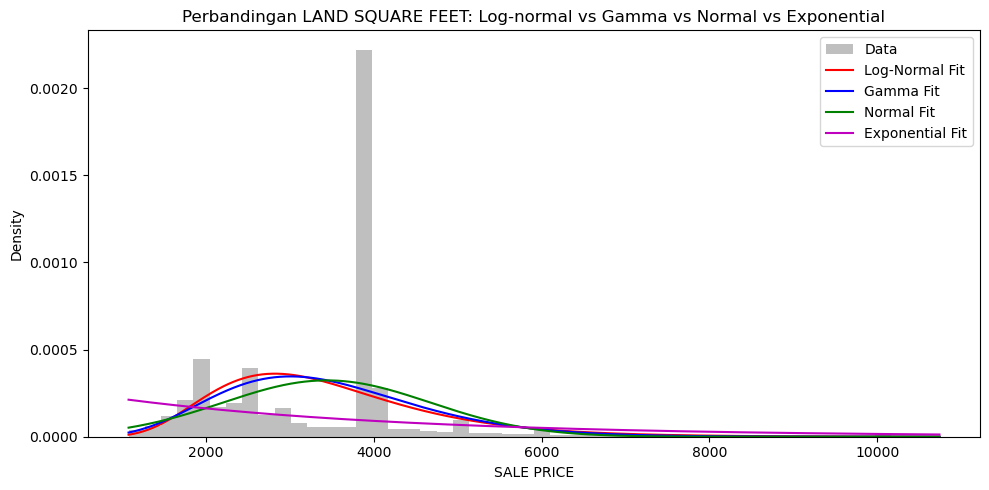

In [54]:
# Mengambil variabel data
data = df['LAND SQUARE FEET']

# Membuat grid untuk plot
x = np.linspace(min(data), max(data), 1000)

# Fitting log-Normal
shape_ln, loc_ln, scale_ln = lognorm.fit(data, floc=0)
pdf_ln = lognorm.pdf(x, shape_ln, loc=loc_ln, scale=scale_ln)

# Fitting Gamma
shape_g, loc_g, scale_g = gamma.fit(data, floc=0)
pdf_g = gamma.pdf(x, shape_g, loc=loc_g, scale=scale_g)

# Fitting Normal
mu_n, std_n = norm.fit(data)
pdf_n = norm.pdf(x, mu_n, std_n)

# Fitting Exponential
loc_e, scale_e = expon.fit(data, floc=0)
pdf_e = expon.pdf(x, loc=loc_e, scale=scale_e)

# Plot Perbandingan
plt.figure(figsize=(10,5))
plt.hist(data, bins=50, density=True, alpha=0.5, color='gray', label='Data')
plt.plot(x, pdf_ln, 'r-', label='Log-Normal Fit')
plt.plot(x, pdf_g, 'b-', label='Gamma Fit')
plt.plot(x, pdf_n, 'g-', label='Normal Fit')
plt.plot(x, pdf_e, 'm-', label='Exponential Fit')
plt.xlabel('SALE PRICE')
plt.ylabel('Density')
plt.legend()
plt.title('Perbandingan LAND SQUARE FEET: Log-normal vs Gamma vs Normal vs Exponential')
plt.tight_layout()
plt.show()

<b> Fitting Parameters LAND SQUARE FEET<b>

In [55]:
print(f"--- Fitting Parameters ---\n")

# Normal Distribution
# Menghitung mean(mu) dan standard deviation(std) dari data
mu_n, std_n = stats.norm.fit(df['LAND SQUARE FEET'])
print(f"Normal Distribution Parameters     : mu={mu_n}, std={std_n:.2f}")


# Log-Norm Distribution
# Menggunakan variabel LOG_SALE_PRICE
df['LOG_LAND_SQUARE_FEET'] = np.log(df['LAND SQUARE FEET'])
# Menghitung parameter dari data yg sudah di logLAND
mu_ln, std_ln = stats.norm.fit(df['LAND SQUARE FEET'])
print(f"Log-Normal Distribution Parameters : mu={mu_ln}, std={std_ln}")

# Gamma Distribution
# Fit parameter distribusi gamma ke data
# floc=0 digunakan karena variabel SALE PRICE tidak mungkin bernilai negatif
params_g = stats.gamma.fit(df['LAND SQUARE FEET'], floc=0)
print(f"Gamma Distribution Parameters      : shape={params_g[0]:.2f}, loc={params_g[1]:.2f}, scale={params_g[2]:.2f}")

# Exponential Distribution
# Fit parameter distribusi eksponensial ke data asli
loc_e, scale_e = stats.expon.fit(df['LAND SQUARE FEET'])
print(f"Exponential Distribution Parameters: loc={loc_e:.2f}, scale={scale_e:.2f}")

--- Fitting Parameters ---

Normal Distribution Parameters     : mu=3439.7218574565127, std=1234.36
Log-Normal Distribution Parameters : mu=3439.7218574565127, std=1234.3626949332058
Gamma Distribution Parameters      : shape=7.97, loc=0.00, scale=431.73
Exponential Distribution Parameters: loc=1080.00, scale=2359.72


<b> Uji Kolmogrov-Smirnov (kstest) LAND SQUARE FEET<b>

In [56]:
# Melakukan Uji Kolmogrov-Smirnov Test (kstest)
print(f"--- Hasil Kolmogrof-Smirnov Test (kstest) ---\n")

# Normal Distribution
kst_n = stats.kstest(df['LAND SQUARE FEET'], 'norm', args=(mu_n, std_n))
print(f"Normal Distribuiton       : {kst_n}")

# Log-Norm Distribbution
kst_ln = stats.kstest(df['LOG_LAND_SQUARE_FEET'], 'norm', args=(mu_ln, std_ln))
print(f"Log-Normal Distribution   : {kst_ln}")

# Gamma Distribution
kst_g = stats.kstest(df['LAND SQUARE FEET'], 'gamma', args=params_g)
print(f"Gamma Distribution        : {kst_g}")

# Eksponential Distribution
kst_e = stats.kstest(df['LAND SQUARE FEET'], 'expon', args=(loc_e, scale_e))
print(f"Exponential Distribution  : {kst_e}")

--- Hasil Kolmogrof-Smirnov Test (kstest) ---

Normal Distribuiton       : KstestResult(statistic=0.2269890417359024, pvalue=0.0)
Log-Normal Distribution   : KstestResult(statistic=0.9972746676461273, pvalue=0.0)
Gamma Distribution        : KstestResult(statistic=0.2642672655739565, pvalue=0.0)
Exponential Distribution  : KstestResult(statistic=0.27173342273633805, pvalue=0.0)


<b> Kesimpulan LAND SQUARE FEET<b>

Kolmogrof-Smirnov Test (kstest) digunakan untuk menguji apakah distribusi data yang dimiliki sesuai dengan distribusi teoretis tertentu. Nilai yg dihasilkan terdiri dari:
- Statistic: semakin kecil nilai statistic, maka semakin baik kesesuaian antara data dan distribusi yang diuji
- p-value: jika p-value < 0.05 maka artinya terdapat bukti yg signifikan bahwa data tidak mengikuti distribusi tersebut.


Pada hasil Kolmogrof-Smirnov Test (kstest) variabel LAND SQUARE FEET dapat disimpulkan:
- Semua distribusi memiliki p-value = 0.0, yang artinya tidak ada distribusi yang cocok secara statistik.
- Jika membandingkan dari nilai statistic, maka berikut ini adalah urutan fit yang terbaik 
Normal (0.2270) → Gamma (0.2643) → Exponential (0.2717) → Log-Normal (0.9973).
- Normal distribution adalah jenis distribusi yang terbaik dari empat distribusi yang duji, meskipun secara statistik tetap tidak signifikan.


### Correlation Heatmap

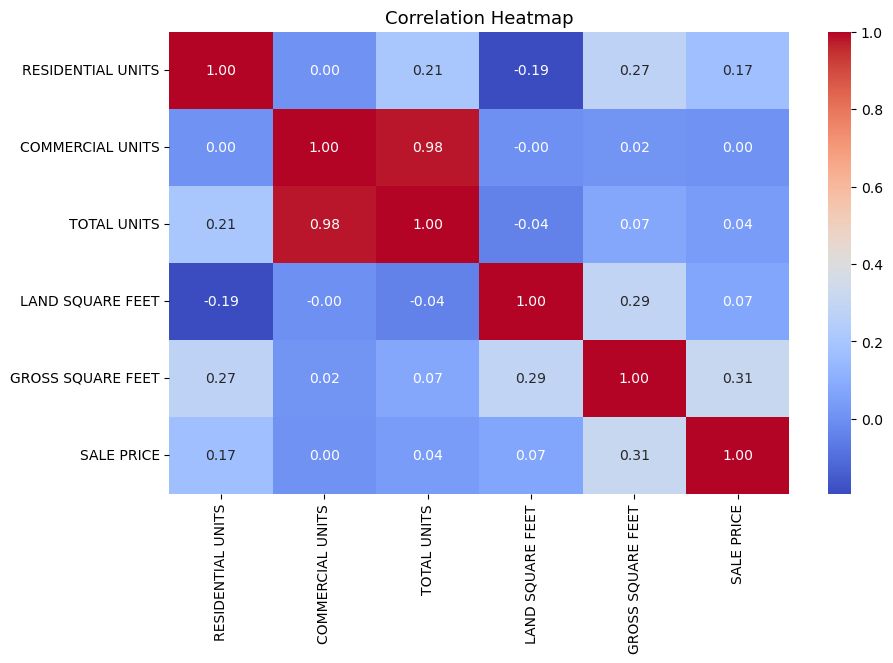

In [57]:
# Mengambil variabel yang beripe numerik 
numeric_df = df[['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']]

# Menghitung korelasi
corr_matrix = numeric_df.corr()

# Menampilkan visualisasi heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap', size=13)
plt.show()

<b> Korelasi tinggi: <b>
    
COMMERCIAL UNITS dan TOTAL UNITS memiliki korelasi 0.98 → terjadi karena total unit biasanya termasuk commercial unit.

<b> Korelasi sedang dengan SALE PRICE<b>
    
GROSS SQUARE FEET memiliki korelasi 0.31 dengan SALE PRICE → menunjukkan bahwa luas bangunan cenderung berkaitan dengan harga jual
    
<b> Korelasi rendah<b>
    
- LAND SQUARE FEET dengan SALE PRICE hanya 0.07 → luas tanah hampir tidak berkorelasi linear langsung dengan harga jual pada data ini.
- RESIDENTIAL UNITS dan SALE PRICE hanya 0.17 → jumlah unit hunian bukan faktor dominan terhadap harga.

<b> Korelasi negatif<b>
    
RESIDENTIAL UNITS dan LAND SQUARE FEET sebesar -0.19 → cenderung ada trade-off, semakin banyak unit hunian, luas tanah rata-rata cenderung lebih kecil.

<b> Kesimpulan Correlation Heatmap<b>

- Model prediksi variabel SALE PRICE akan lebih terbantu dengan variabel GROSS SQUARE FEET dibandingkan dengan variabel LAND SQUARE FEET.
- Korelasi yang sangat tinggi antara varibale COMMERCIAL UNITS dan TOTAL UNITS menunjukkan adanya multikolinearitas sehingga salah satu mungkin perlu dihapus dalam model regresi untuk menghindari redundansi.

#### Wilayah mana yang memiliki harga jual rata-rata tertinggi?

In [58]:
# Mengubah tipe data pada variabel BOROUGH 
df['BOROUGH'] = df['BOROUGH'].astype(str)

# Mengubah data pada variabel BOROUGH
df['BOROUGH'] = df['BOROUGH'].str.replace("1", "Manhattan")
df['BOROUGH'] = df['BOROUGH'].str.replace("2", "Bronx")
df['BOROUGH'] = df['BOROUGH'].str.replace("3", "Brooklyn")
df['BOROUGH'] = df['BOROUGH'].str.replace("4", "Queens")
df['BOROUGH'] = df['BOROUGH'].str.replace("5", "States Island")

In [59]:
avg_sale_by_borough = df.groupby('BOROUGH')['SALE PRICE'].mean().sort_values(ascending=False)
avg_sale_by_borough

BOROUGH
Manhattan        1.761760e+06
Brooklyn         1.119920e+06
Queens           8.043521e+05
States Island    7.058048e+05
Bronx            5.627101e+05
Name: SALE PRICE, dtype: float64

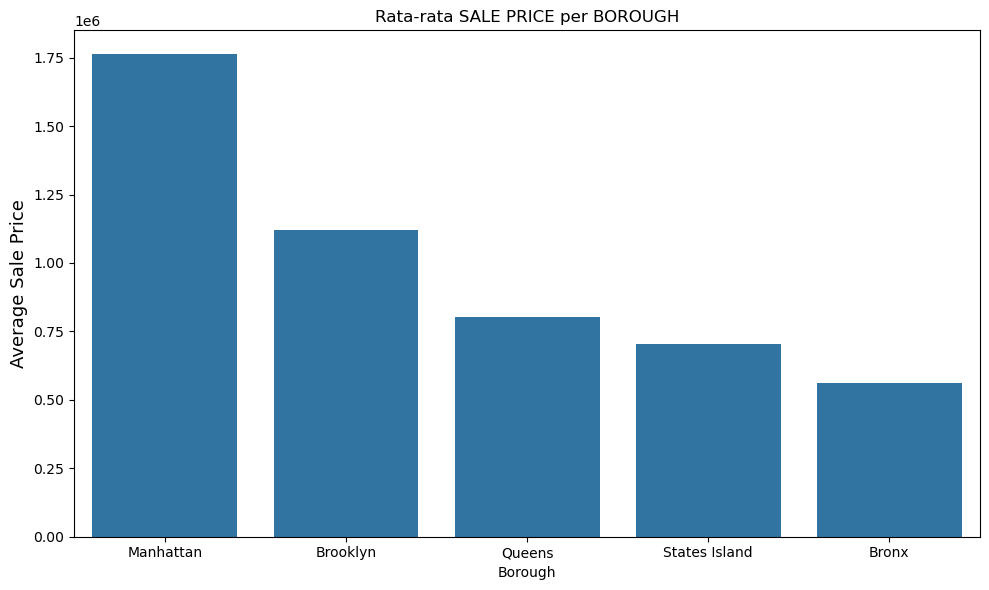

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_sale_by_borough.index, y=avg_sale_by_borough.values)
plt.title("Rata-rata SALE PRICE per BOROUGH")
plt.xlabel("Borough")
plt.ylabel("Average Sale Price", size=13)
plt.tight_layout()
plt.show()

<b> Penjelasan<b>
Berdasarkan visualisasi yang dihasilkan, dapat diketahui bahwa:
- Manhattan memiliki rata-rata harga jual tertinggi karena merupakan pusat bisnis dan properti premium.
- Brooklyn berada di posisi kedua karena merupakan kawasan kreatif.
- Queens memiliki rata-rata menengah dengan variasi antara area residensial dan komersial.
- State Island memiliki sedikit selisih dengan Queens karena wilayah ini sifatnya lebih suburban.
- Bronx memiliki rata-rata terendah yang menunjukkan keterjangkauan yang relatif dibandingkan borough lainnya.

<b> Insight<b>
- Perbedaan harga ini mencerminkan faktor lokasi, permintaan pasar, dan karakteristik demografis tiap borough.
- Analisis ini dapat digunakan untuk segmentasi pasar properti dan penentuan strategi investasi yang tepat.

#### Bagaimana tren penjualan properti berdasarkan waktu (per bulan/tahun)?

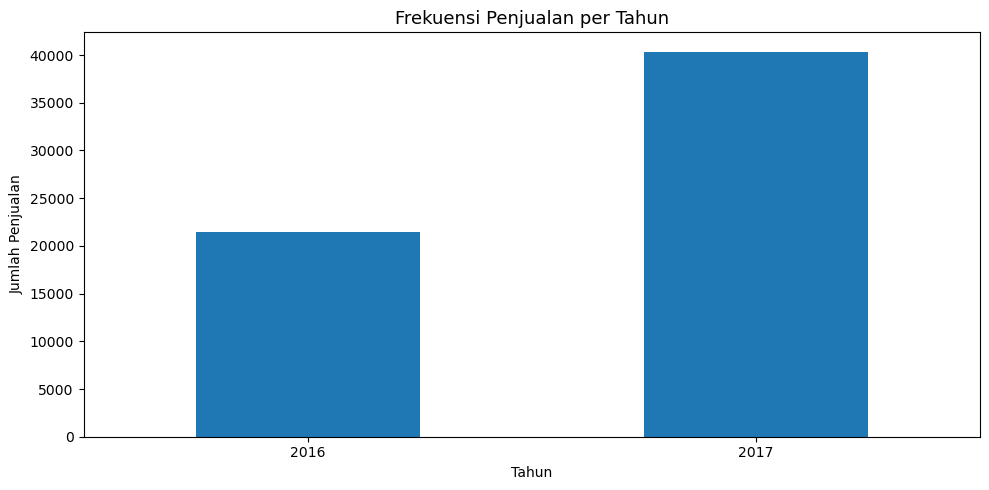

In [61]:
# Membuat kolom tahun dan bulan
df['SALE YEAR'] = df['SALE DATE'].dt.year
df['SALE MONTH'] = df['SALE DATE'].dt.to_period('M').astype(str)

# Membuat plot tren tahunan
plt.figure(figsize=(10,5))
df['SALE YEAR'].value_counts().sort_index().plot(kind='bar')
plt.title('Frekuensi Penjualan per Tahun', size=13)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Penjualan')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

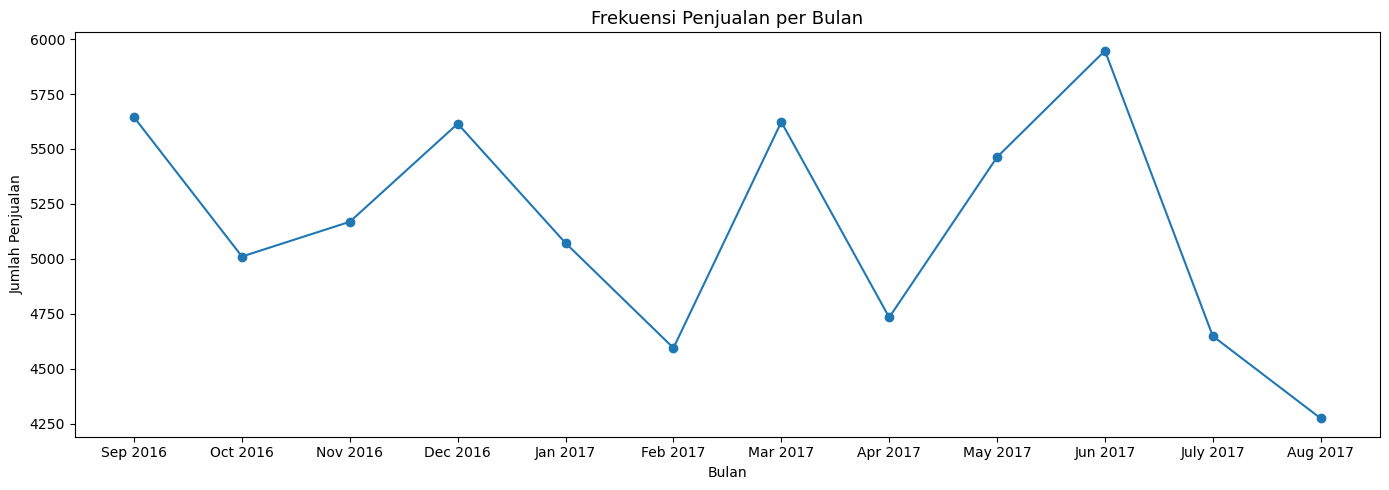

In [62]:
# Membuat plot tren bulanan
monthly_sale = df['SALE MONTH'].value_counts().sort_index()
plt.figure(figsize=(14, 5))
monthly_sale.plot(kind='line', marker='o')
plt.title('Frekuensi Penjualan per Bulan', size=13)
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.xticks(
    ticks=range(0, 12),  
    labels=['Sep 2016', 'Oct 2016', 'Nov 2016', 'Dec 2016', 'Jan 2017', 'Feb 2017',
            'Mar 2017', 'Apr 2017', 'May 2017', 'Jun 2017', 'July 2017', 'Aug 2017'],
    rotation=0
)
plt.tight_layout()
plt.show()

<b> Penjelasan<b>
Berdasarkan visualisasi yang dihasilkan, dapat diketahui bahwa:
- Frekuensi penjulan units pada tahun 2017 lebih tinggi dibandingkan dengan tahun 2016.
- Hal tersebut dikarenakan frekuensi penjualan pada dataset didominasi oleh tahun 2017.
- Penjualan paling tinggi terjadi pada Juni 2017, sedangkan penjualan terendah terjadi pada Agustus 2017


#### Bagaimana korelasi antara variabel SALE PRICE dan GROSS SQUARE FEET?

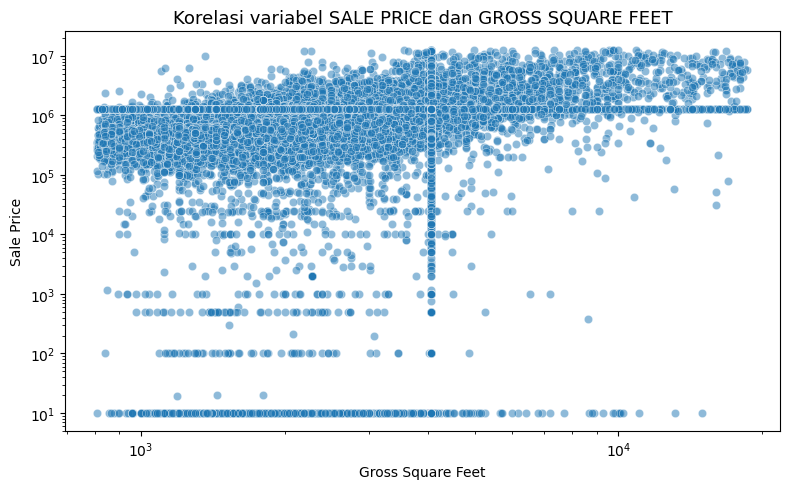

In [63]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="GROSS SQUARE FEET", y="SALE PRICE", alpha=0.5)
plt.title("Korelasi variabel SALE PRICE dan GROSS SQUARE FEET", size=13)
plt.xlabel("Gross Square Feet")
plt.ylabel("Sale Price")
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.show()

In [64]:
pearson_corr = df['GROSS SQUARE FEET'].corr(df['SALE PRICE'], method='pearson')
spearman_corr = df['GROSS SQUARE FEET'].corr(df['SALE PRICE'], method='spearman')

print(f"Korelasi Pearson: {pearson_corr:.3f}")
print(f"Korelasi Spearman: {spearman_corr:.3f}")


Korelasi Pearson: 0.312
Korelasi Spearman: 0.223


<b> Penjelasan<b>
    
Dari hasil Korelasi Pearson dan Korelasi Spearman untuk korelasi variabel SALE PRICE dan GROSS SQUARE FEET menunjukkan nilai korelasinya lebih tinggi jika dibandingkan dengan korelasi antara variabel SALE PRICE dan LAND SQUARE FEET. Nilai korelasi ini menunjukkan hubungan lemah sampai sedang yang artinya hubungan antar variabel dinilai lebih kuat sehingga variabel GROSS SQUARE FEET dianggap lebih relevan sebagai prediktor SALE PRICE dibandingkan variabel LAND SQUARE FEET.

#### Bagaimana korelasi antara variabel SALE PRICE dan LAND SQUARE FEET?

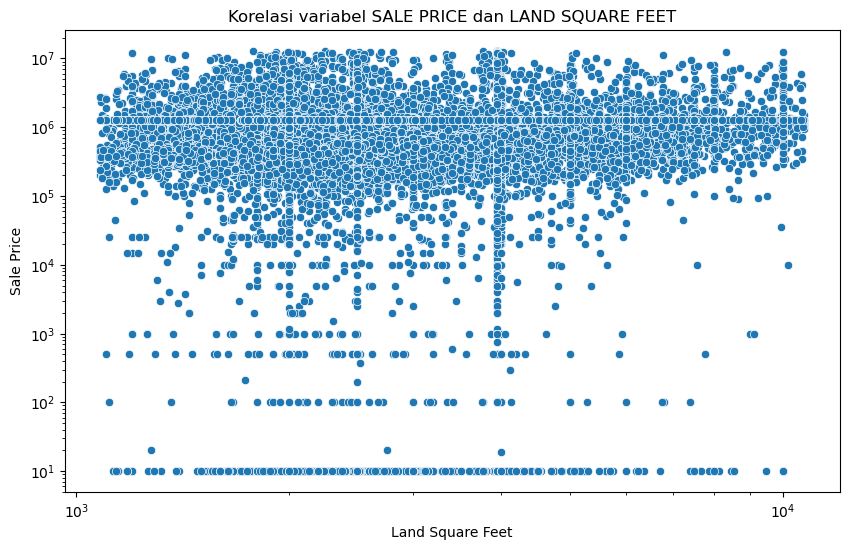

In [65]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df)
plt.title('Korelasi variabel SALE PRICE dan LAND SQUARE FEET')
plt.xlabel('Land Square Feet')
plt.ylabel('Sale Price')
plt.xscale('log')
plt.yscale('log')  # Karena data sangat skewed
plt.show()

In [66]:
pearson_corr = df['LAND SQUARE FEET'].corr(df['SALE PRICE'], method='pearson')
spearman_corr = df['LAND SQUARE FEET'].corr(df['SALE PRICE'], method='spearman')

print(f"Korelasi Pearson: {pearson_corr:.3f}")
print(f"Korelasi Spearman: {spearman_corr:.3f}")

Korelasi Pearson: 0.072
Korelasi Spearman: 0.082


<b> Penjelasan<b>
    
Dari hasil Korelasi Pearson dan Korelasi Spearman untuk korelasi variabel SALE PRICE dan LAND SQUARE FEET menunjukkan nilai korelasi yang jauh lebih rendah dibandingkan dengan korelasi antara variabel SALE PRICE dan GROSS SQUARE FEET. Nilai korelasi ini menunjukkan hubungan linear antar variabel yang sangat lemah artinya hubungan antar variabel dinilai tidak memiliki keterkaitan sehingga variabel GROSS SQUARE FEET dianggap lebih relevan sebagai prediktor SALE PRICE dibandingkan variabel LAND SQUARE FEET.

### Confidence Interval

<b> Menentukan 95% Confidence Interval rata-rata Sale Price untuk properti dengan Gross Square Feet di atas median.<b>

In [67]:
# Median
median_gross_square = statistics.median(df['GROSS SQUARE FEET'])

# Mengambil subset data yang lebih besar dari median
subset_df = df[df['GROSS SQUARE FEET'] > median_gross_square]

print(f'Median dari variabel GROSS SQUARE FEET : {median_gross_square}')
print(f'Jumlah data subset: {subset_df.shape[0]}')
subset_df.head()

Median dari variabel GROSS SQUARE FEET : 3432.0
Jumlah data subset: 30896


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,...,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,LOG_GROSS_SQUARE_FEET,LOG_LAND_SQUARE_FEET,LOG_SALE_PRICE,SALE YEAR,SALE MONTH
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,...,1900,2,C2,6.625000e+06,2017-07-19,8.770284,7.398174,15.706361,2017,2017-07
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,...,1900,2,C7,1.276456e+06,2016-12-09,8.962264,7.701652,14.059598,2016,2016-12
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,...,1913,2,C4,3.936272e+06,2016-09-23,8.823795,7.728416,15.185745,2016,2016-09
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,...,1900,2,C2,8.000000e+06,2016-11-17,8.437067,7.770223,15.894952,2016,2016-11
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,10009,20,...,1900,2,C4,1.276456e+06,2017-07-20,9.182969,7.855932,14.059598,2017,2017-07


In [68]:
# Mean
mean_price = statistics.mean(subset_df['SALE PRICE'])
print(f'Mean dari variabel SALE PRICE                       : {mean_price}')
# Standard Deviation
std_price = statistics.stdev(subset_df['SALE PRICE'])
print(f'Standard Deviation dari variabel SALE PRICE         : {std_price}')
# Panjang Data
len_price = len(subset_df['SALE PRICE'])
print(f'Panjang data dari variabel SALE PRICE:              : {len_price}')
# Standard Error
se_price = std_price / np.sqrt(len_price)
print(f'Standard Error variabel SALE PRICE:                 : {se_price}\n')


# Standard Deviation
std_gross_square = statistics.stdev(subset_df['GROSS SQUARE FEET'])
print(f'Standard Deviation dari variabel GROSS SQUARE FEET  : {std_gross_square}')
# Mean
mean_gross_square = statistics.mean(subset_df['GROSS SQUARE FEET'])
print(f'Mean dari variabel GROSS SQUARE FEET                : {mean_gross_square}')
# Panjang Data
len_gross_square = len(subset_df['GROSS SQUARE FEET'])
print(f'Panjang data dari variabel GROSS SQUARE FEET:       : {len_price}')
# Standard Error
se_gross_square = std_gross_square / np.sqrt(len_gross_square)
print(f'Standard Error variabel GROSS SQUARE FEET:          : {se_gross_square}\n')

Mean dari variabel SALE PRICE                       : 1357366.8740212866
Standard Deviation dari variabel SALE PRICE         : 1596660.8909487152
Panjang data dari variabel SALE PRICE:              : 30896
Standard Error variabel SALE PRICE:                 : 9083.674415226145

Standard Deviation dari variabel GROSS SQUARE FEET  : 1247.5064327614189
Mean dari variabel GROSS SQUARE FEET                : 4278.276281618696
Panjang data dari variabel GROSS SQUARE FEET:       : 30896
Standard Error variabel GROSS SQUARE FEET:          : 7.097275526910191



<b> Untuk Confidence Interval 95% menggunakan z = 1.96.<b>

In [69]:
z = 1.96
lower = mean_price - (z*se_price)
upper = mean_price + (z*se_price)
print(f'95% Confidence Interval: \n lower bound:  ({lower})\n upper bound:  ({upper})')

95% Confidence Interval: 
 lower bound:  (1339562.8721674434)
 upper bound:  (1375170.8758751298)


### Hypothesis Testing

<b> Menentukan 95% Confidence Interval rata-rata Sale Price untuk properti dengan Gross Square Feet di atas median.<b>

In [70]:
# Membagi data menjadi 2 subset
large_gross_square = df[df['GROSS SQUARE FEET'] > median_gross_square]['SALE PRICE']
small_gross_square = df[df['GROSS SQUARE FEET'] <= median_gross_square]['SALE PRICE']

- H0(Null Hypothesis) : Tidak ada perbedaan antara rata-rata SALE PRICE antara kedua kelompok
(SALE PRICE < Median) = (SALE PRICE > Median)

- H1(Alternative Hypothesis): Ada perbedaan rata-rata SALE PRICE antara kedua kelompok 
(SALE PRICE < Median) != (SALE PRICE > Median)

In [71]:
# Confidence Interval untuk bangunan dengan GROSS SQUARE FEET di atas median

# Mean variabel large_gross_square
mean_large = np.mean(large_gross_square)

# Standard Error variabel large_square_gross
se_large = stats.sem(large_gross_square) #Standard Error

# Confidence interval variabel large_square_gross
ci_large = stats.t.interval(0.95, len(large_gross_square)-1, loc=mean_large, scale=se_large)

In [72]:
# Melakukan Two-Sample t-test(independent samples)
t_stat, p_value = stats.ttest_ind(large_gross_square, small_gross_square, equal_var=False)

print(f't-statistic: {t_stat}')
print(f'p-value    : {p_value}')

t-statistic: 56.08131779766552
p-value    : 0.0


In [73]:
# Hypothesis Testing
alpha = 0.05
if p_value < alpha:
    print("Tolak H0 → Ada perbedaan signifikan rata-rata SALE PRICE antara kelompok besar dan kecil.")
else:
    print("Gagal tolak H0 → Tidak ada perbedaan signifikan.")

Tolak H0 → Ada perbedaan signifikan rata-rata SALE PRICE antara kelompok besar dan kecil.


### Conclusion
Analisa project ini menggunakan dataset Penjualan Properti di New York. Setelah dilakukan eksplorasi didapatkan informasin di antaranya:

<b> Distribusi Variabel<b>
- Variabel SALE PRICE memiliki distribusi exponential setelah dilakukan uji Kolmogrof-Smirnov dengan kstest 0.1552
- Variabel GROSS SQUARE FEET memiliki distribusi normal setelah dilakukan uji Kolmogrof-Smirnov dengan kstest 0.2237
- Variabel LAND SQUARE FEET memiliki distribusi normal setelah dilakukan uji Kolmogrof-Smirnov dengan kstest 0.2270

<b> Analisis Harga dan Lokasi<b>
    
        
Manhattan memiliki nilai rata-rata harga jual tertinggi dengan nilai rata-rata 1.7618

<b> Tren Penjualan<b>
- Frekuensi penjulan units pada tahun 2017 lebih tinggi dibandingkan dengan tahun 2016 
- Penjualan paling tinggi terjadi pada Juni 2017, sedangkan penjualan terendah terjadi pada Agustus 2017

<b> Korelasi<b>
    
Dari hasil Korelasi Pearson dan Korelasi Spearman untuk korelasi variabel SALE PRICE dan GROSS SQUARE FEET menunjukkan nilai korelasinya lebih tinggi jika dibandingkan dengan korelasi antara variabel SALE PRICE dan LAND SQUARE FEET, yaitu dengan korelasi Pearson 0.312 dan korelasi Spearman 0.223

<b> Hypothesis Testing<b>


- H0(Null Hypothesis) : Tidak ada perbedaan antara rata-rata SALE PRICE antara kedua kelompok
(SALE PRICE < Median) = (SALE PRICE > Median)

- H1(Alternative Hypothesis): Ada perbedaan rata-rata SALE PRICE antara kedua kelompok 
(SALE PRICE < Median) != (SALE PRICE > Median)


- Hasil uji t menghasilkan p-values(nilai probabilitas) 0.0 dan nilai t-statistic 56.081
- Dikarenakan p-values 0.0 yang mana < 0.05 maka H0 ditolak artinya terdapat perbedaan yang signifikan antara variabel GROSS SQUARE FEET yang mempengaruhi variabel SALE PRICE.
- Selain uji hipotesis, dihitung pula Confidence Interval 95% untuk rata-rata SALE PRICE pada properti dengan GROSS SQUARE FEET di atas median, yang memberikan rentang estimasi rata-rata populasi secara statistik.